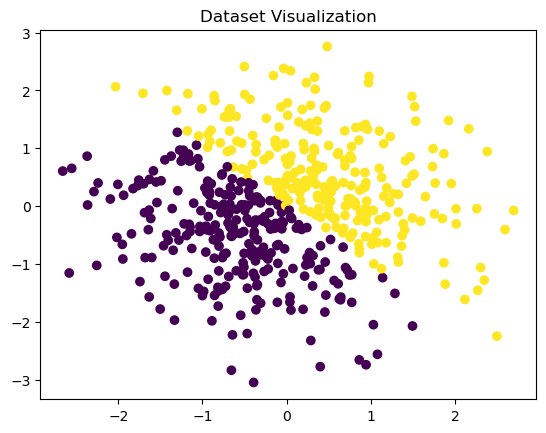

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset
np.random.seed(0)
n_samples = 500

# Generate features
X = np.random.randn(n_samples, 2)  # 500 samples, 2 features

# Generate labels (0 or 1)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Dataset Visualization")
plt.show()

Accuracy: 0.99


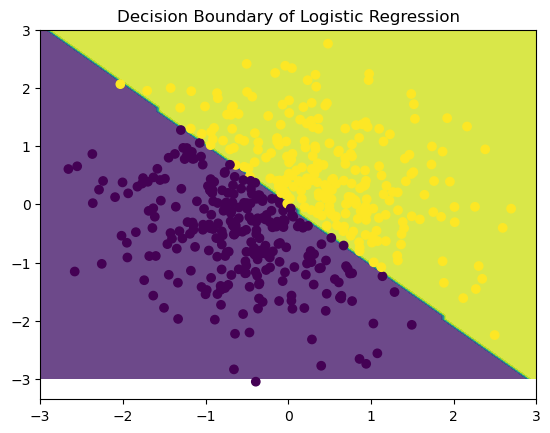

In [19]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Linear model
            linear_model = np.dot(X, self.theta) + self.bias
            # Predictions
            y_pred = self.sigmoid(linear_model)
            # Compute gradients
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)
            # Update parameters
            self.theta -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred > 0.5, 1, 0)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(learning_rate=0.01, n_iterations=1000)
log_reg.fit(X, y)

# Make predictions
y_pred = log_reg.predict(X)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Decision Boundary of Logistic Regression")
plt.show()

### Can we approach this using a regression model? ###

Accuracy: 0.87


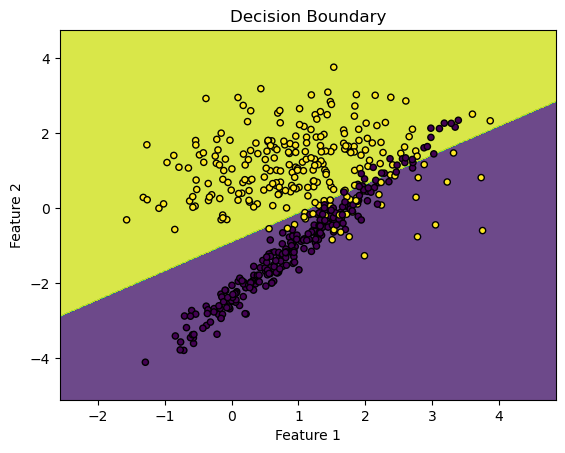

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Generate a synthetic dataset
np.random.seed(0)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=0)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(learning_rate=0.01, n_iters=10000000)
log_reg.fit(X, y)

# Make predictions
y_pred = log_reg.predict(X)

# Evaluate model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, log_reg)